# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import csv

# Import API key
from api_keys import weather_api_key





# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)



# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [19]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
        

# Print the city count to confirm sufficient count
len(cities)

618

In [16]:
df=pd.DataFrame({"Cities": cities})

df[["Lat","Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed","Country", "Date"]]=""
print(len(df))
df.head()

0


,Cities,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [11]:
#Weather API
url = "http://api.openweathermap.org/data/2.5/weather?"

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [28]:
record=0
print("Beginning Data Retrieval")     
print("-----------------------------")

for index, row in df.iterrows():
    record += 1
    city = row['Cities']
    query_url = url + "appid=" + owm_key + "&q=" + city + "&units=imperial"
    try: 
        resp = requests.get(query_url).json()
        
        df.loc[index,"Lat"]= resp['coord']['lat']
        df.loc[index,"Lng"]= resp['coord']['lon']
        df.loc[index,"Max Temp"]= resp['main']['temp_max']
        df.loc[index,"Humidity"]= resp['main']['humidity']
        df.loc[index,"Cloudiness"]= resp['clouds']['all']
        df.loc[index,"Wind Speed"]= resp['wind']['speed']
        df.loc[index,"Country"]= resp['sys']['country']
        df.loc[index,"Date"]= resp['dt']
        
        print(f"Processing Record {record} | {city}")
    except:
        df.drop(index, inplace=True)
        print("City not found. Skipping...")

Beginning Data Retrieval
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [26]:
city_data = pd.DataFrame({"City":city_name,"Id":city_id})

city_data["country"]=""
city_data["lat"]=""
city_data["lng"]=""
city_data["Cloudiness"]=""
city_data["humidity"]=""
city_data["temperature"]=""
city_data["wind_speed"]=""


city_data.head()

,City,Id,country,lat,lng,Cloudiness,humidity,temperature,wind_speed


In [22]:
for index,row in city_data.iterrows():
    try:
        parameters={"q":row["City"],"units":"metric","appid":weather_api_key}
        repo=requests.get(base_url,params=parameters).json()
        
        city_data.loc[index,"country"]=repo["sys"]["country"]
        city_data.loc[index,"lat"]=repo["coord"]["lat"]
        city_data.loc[index,"lng"]=repo["coord"]["lon"]
        city_data.loc[index,"Cloudiness"]=repo["clouds"]["all"]
        city_data.loc[index,"humidity"]=repo["main"]["humidity"]
        city_data.loc[index,"temperature"]=repo["main"]["temp"]
        city_data.loc[index,"wind_speed"]=repo["wind"]["speed"]
        
    except KeyError:
        print("Missing Data")

city_data


,City,Id,country,lat,lng,Cloudiness,humidity,temperature,wind_speed


In [119]:
city_data.to_csv("City_Data_Output.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [120]:
filt=city_data["humidity"]>100
city_data.drop(index=city_data[filt].index,inplace=True)
city_data.head()



,City,Id,country,lat,lng,Cloudiness,humidity,temperature,wind_speed


In [65]:
#  Get the indices of cities that have humidity over 100%.


In [66]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

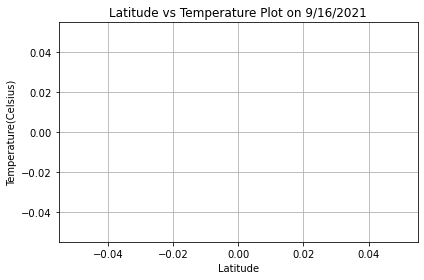

 Analisys: Temperature increases gradually towards equator.


In [21]:
city_data.plot(kind="scatter",x="lat",y="temperature",grid="True")
plt.title("Latitude vs Temperature Plot on 9/16/2021")
plt.xlabel("Latitude")
plt.ylabel("Temperature(Celsius)")
plt.tight_layout()
plt.savefig("lat_vs_temp.png")
plt.show()

print("\u001b[32m Analisys: Temperature increases gradually towards equator.\u001b[0m")

## Latitude vs. Humidity Plot

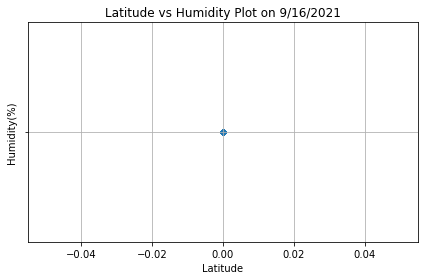

 Analisys: There is no clear relation between latitude and humidity.


In [177]:
city_data.plot(kind="scatter",x="lat",y="humidity",grid="True")
plt.title("Latitude vs Humidity Plot on 9/16/2021")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.tight_layout()
plt.savefig("lat_vs_humidity.png")
plt.show()

print("\u001b[32m Analisys: There is no clear relation between latitude and humidity.\u001b[0m")


## Latitude vs. Cloudiness Plot

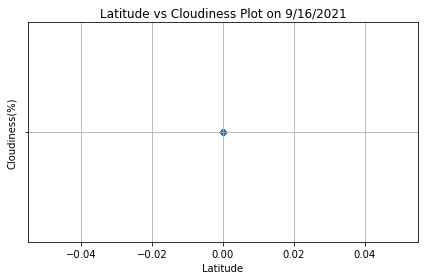

Analisys:There is no clear relation between latitude and cloudiness.


In [178]:
city_data.plot(kind="scatter",x="lat",y="Cloudiness",grid="True")
plt.title("Latitude vs Cloudiness Plot on 9/16/2021")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.tight_layout()
plt.savefig("lat_vs_cloudiness.png")
plt.show()

print("\u001b[32mAnalisys:There is no clear relation between latitude and cloudiness.\u001b[0m")


## Latitude vs. Wind Speed Plot

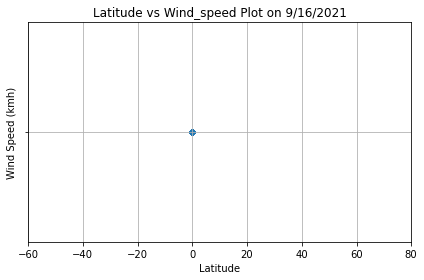

Analisys: There is no clear relation between latitude and windspeed.


In [179]:
city_data.plot(kind="scatter",x="lat",y="wind_speed",grid="True")
plt.title("Latitude vs Wind_speed Plot on 9/16/2021")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (kmh)")
plt.xlim(-60,80)
plt.tight_layout()
plt.savefig("lat_vs_windspeed.png")
plt.show()

print("\u001b[32mAnalisys: There is no clear relation between latitude and windspeed.\u001b[0m")


## Linear Regression

In [159]:
filt=city_data["lat"] >= 1
city_data_north=city_data.loc[filt, :]

filt=city_data["lat"] < 1
city_data_south=city_data.loc[filt,:]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [181]:
x_values=city_data_north["lat"].astype(float)
y_values=city_data_north["temperature"].astype(float)

(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,  y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.grid(True)
plt.xlabel("Latitude")
plt.xlim(0,80)

plt.ylabel("Temperature(Fahrenheit)")
plt.title("Temp vs. Latitude for Northern Hemisphere")
plt.tight_layout()
plt.savefig("temp_lat_north.png")
plt.show()

print("\u001b[32m Analisys: In northern hemisphere as we move further from equator towards pole temperature gradually decreases.\u001b[0m")


ValueError: Inputs must not be empty.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
x_values=city_data_south["lat"].astype(float)
y_values=city_data_south["temperature"].astype(float)

(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(-20,40),fontsize=15,color="red")
plt.grid(True)
plt.xlim(-56,0)
plt.xlabel("Latitude")
plt.ylabel("Temperature(Fahrenheit)")
plt.title("Temp vs. Latitude for Southern Hemisphere")
plt.tight_layout()
plt.savefig("temp_lat_south.png")
plt.show()

print("\u001b[32m Analisys: In sorthern hemisphere as we move further from equator towards pole temperature gradually decreases.\u001b[0m")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [185]:
x_values=city_data_north["lat"].astype(float)
y_values=city_data_north["humidity"].astype(float)

(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

plt.figure(figsize=(7,5))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(60,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.xlim(0,80)
plt.grid(True)
plt.title("Humidity vs. Latitude for Northern Hemisphere")
plt.tight_layout()
plt.savefig("humidity_lat_north.png")
plt.show()

print("\u001b[32m Analisys:There is no clear relationship between humidity and latitude in northern hemisphere.\n Humidity varies on region basis and depends on geographic location and other weather factors.\u001b[0m")


ValueError: Inputs must not be empty.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [189]:
x_values=city_data_south["lat"].astype(float)
y_values=city_data_south["humidity"].astype(float)

(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

plt.figure(figsize=(7,5))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid(True)
plt.xlim(-56,0)
plt.title("Humidity vs. Latitude for Southern Hemisphere")
plt.tight_layout()
plt.savefig("humidity_lat_south.png")
plt.show()

print("\u001b[32m Analisys:Although there is very little slope in regression line,there is no prominent relationship between humidity and latitude in southern hemispere.Humidity varies on region basis and depends on geographic location and other weather factors.\u001b[0m") 
         

ValueError: could not convert string to float: ''

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


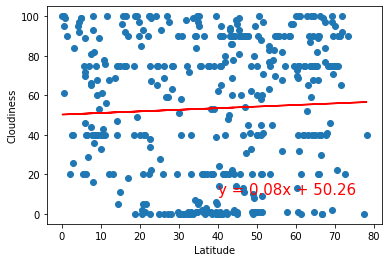

In [29]:
x_values=city_data_north["lat"].astype(float)
y_values=city_data_north["Cloudiness"].astype(float)

(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

plt.figure(figsize=(7,5))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(60,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid(True)
plt.xlim(0,80)
plt.title("Cloudiness vs. Latitude for Northern Hemisphere")

plt.tight_layout()
plt.savefig("cloudiness_lat_north.png")
plt.show()

print("\u001b[32m Analisys:Slope of the regression line shows a slow change in\n percentage of cloudiness from equator towards north pole.\u001b[0m")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [190]:
x_values=city_data_south["lat"].astype(float)
y_values=city_data_south["Cloudiness"].astype(float)

(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

plt.figure(figsize=(7,5))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(-50,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid(True)
plt.xlim(-56,0)
plt.title("Cloudiness vs. Latitude for Southern Hemisphere")
plt.tight_layout()
plt.savefig("cloudiness_lat_south.png")
plt.show()

print("\u001b[32m Analisys:There is no prominent relation between cloudiness and latitude in southern hemisphere.\nCloudiness varies according to to geographic location and other weather factors.\u001b[0m")



ValueError: could not convert string to float: ''

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


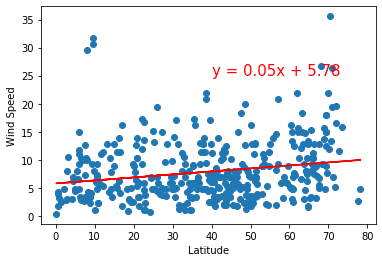

In [31]:
x_values=city_data_north["lat"].astype(float)
y_values=city_data_north["wind_speed"].astype(float)

(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

plt.figure(figsize=(7,5))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(50,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind_Speed(mph)")
plt.grid(True)
plt.xlim(0,80)
plt.title("Wind_speed vs. Latitude for Northern Hemisphere")
plt.tight_layout()
plt.savefig("windspeed_lat_north.png")
plt.show()

print("\u001b[32m Analisys:There is no clear relation between wind speed and latitude in northern hemisphere.\u001b[0m")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [191]:
x_values=city_data_south["lat"].astype(float)
y_values=city_data_south["wind_speed"].astype(float)

(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

plt.figure(figsize=(7,5))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(-55,1),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind_Speed(mph)")
plt.grid(True)
plt.xlim(-57,0)
plt.title("Wind_speed vs. Latitude for Southern Hemisphere")
plt.tight_layout()
plt.savefig("windspeed_lat_south.png")
plt.show()

print("\u001b[32m Analisys:There is no clear relation between windspeed and latitude in sorthern hemisphere.\n Windspeed varies according to geographic location.\u001b[0m")



ValueError: could not convert string to float: ''